# MUSHROOM CLASSIFICATION

### Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import cross_val_predict, cross_val_score

## Exploratory Data Analysis

In [2]:
# loading the dataset
data = pd.read_csv("mushrooms.csv")

In [3]:
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [4]:
data.shape

(8124, 23)

In [5]:
#describing dataset
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Unique occurrences of ‘class’ column

In [6]:
data['class'].unique()

array(['p', 'e'], dtype=object)

As we can see, there are two unique values in the ‘class’ column of the dataset namely:

‘p’ -> poisonous and ‘e’ -> edible

In [7]:
#checking nullvalues
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

As we can see that there are no null values.

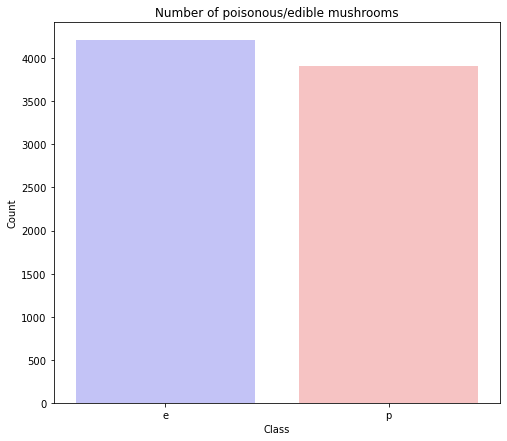

In [8]:
count = data['class'].value_counts()
sns.set_context(font_scale=1.5)
fig, ax = plt.subplots(figsize=(8, 7))
sns.barplot(x=count.index, y=count.values, alpha=0.8, palette="bwr", ax=ax)
ax.set(xlabel='Class', ylabel='Count', title='Number of poisonous/edible mushrooms')
#plt.savefig("count.jpeg", format='jpeg', dpi=300)
plt.show()


In [9]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [10]:
data.shape

(8124, 23)

In [11]:
X = data.drop(['class'], axis=1)  
y = data["class"]

X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


## Data Manipulation

In [12]:
labelencoder_x=LabelEncoder()
for column in X.columns:
    X[column] = labelencoder_x.fit_transform(X[column])
    
labelencoder_y=LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [13]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [14]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [15]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


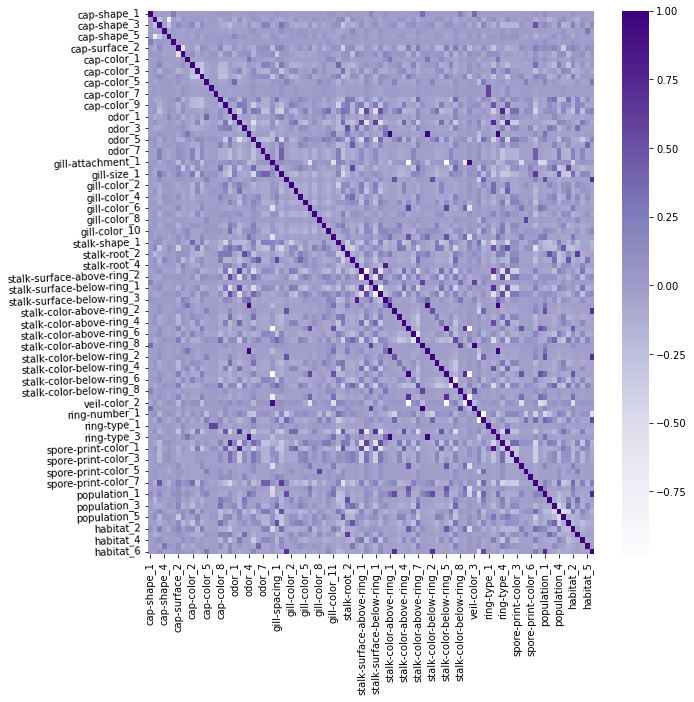

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),linewidths=.0,cmap="Purples")
plt.yticks(rotation=2);

## Dividing dataset into testing and training

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X2 = sc.fit_transform(X)
X_test = sc.transform(X_test)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=3)

## Applying Principle component Analysis

In [20]:
from sklearn.decomposition import PCA

# Initialize a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the PCA model to the training data and transform it
X_train_pca = pca.fit_transform(X_train)

# Transform the test data using the fitted PCA model
X_test_pca = pca.transform(X_test)

# Print the original shape of the training data and the PCA-transformed data
print("Original shape:", X_train.shape)
print('Shape of PCA data:', X_train_pca.shape)


Original shape: (6499, 95)
Shape of PCA data: (6499, 2)


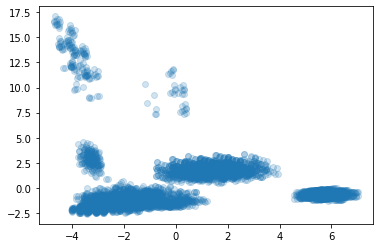

In [21]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.2)

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_pca,y_train)

LogisticRegression()

In [23]:
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,lr.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,lr.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,lr.predict(X_train_pca))))
res = cross_val_score(lr, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 0.9078

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3371
           1       0.96      0.84      0.90      3128

    accuracy                           0.91      6499
   macro avg       0.91      0.91      0.91      6499
weighted avg       0.91      0.91      0.91      6499


Confusion Matrix:
[[3262  109]
 [ 490 2638]]

Average Accuracy:	0.9078

Standard Deviation:	0.0085


In [24]:
y_pred = lr.predict(X_test_pca)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print("TEST RESULTS")
print(results)

TEST RESULTS
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.900923   0.957664  0.832487  0.890699


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


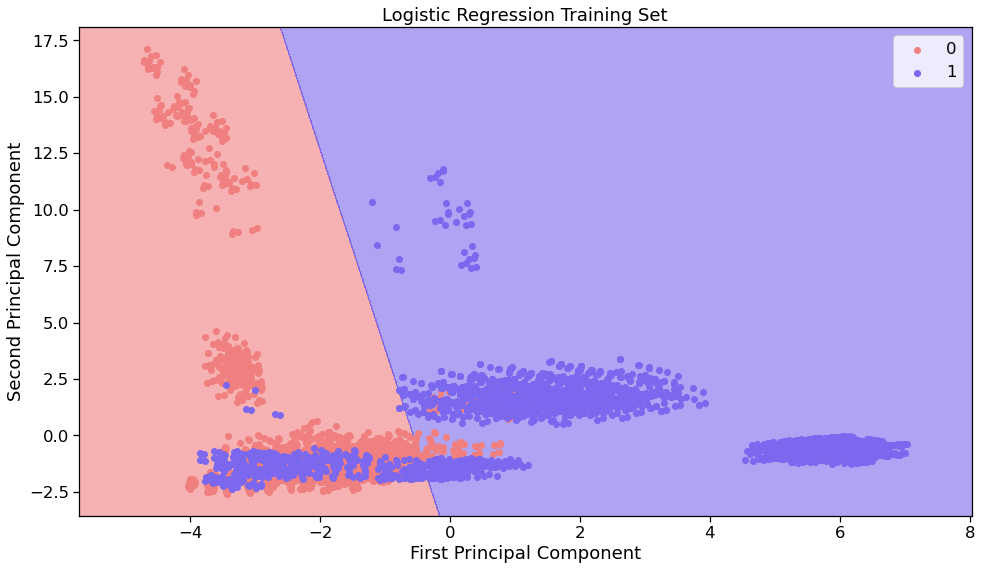

In [25]:
import seaborn as sns
import matplotlib.colors as colors

sns.set_context(context='notebook',font_scale=1.5)

fig, ax = plt.subplots(figsize=(16,9))

cmap = colors.ListedColormap(('lightcoral', 'mediumslateblue'))

X1, X2 = np.meshgrid(np.arange(start = X_train_pca[:, 0].min() - 1, stop = X_train_pca[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_train_pca[:, 1].min() - 1, stop = X_train_pca[:, 1].max() + 1, step = 0.01))

Z = lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
ax.contourf(X1, X2, Z, alpha = 0.6, cmap = cmap)


ax.set_xlim(X1.min(), X1.max())
ax.set_ylim(X2.min(), X2.max())

# plot the training data
for i,j in enumerate(np.unique(y_train)):
    ax.scatter(X_train_pca[y_train == j, 0], X_train_pca[y_train == j, 1],
                c = cmap(i), label = j)

# add a title and labels for the x and y axes
ax.set_title("Logistic Regression Training Set")
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')

# add a legend to the plot
ax.legend()

# save the plot to a file
plt.savefig("lr_pci_tr.jpeg", format='jpeg', dpi=300, bbox_inches='tight')

# show the plot
plt.show()



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


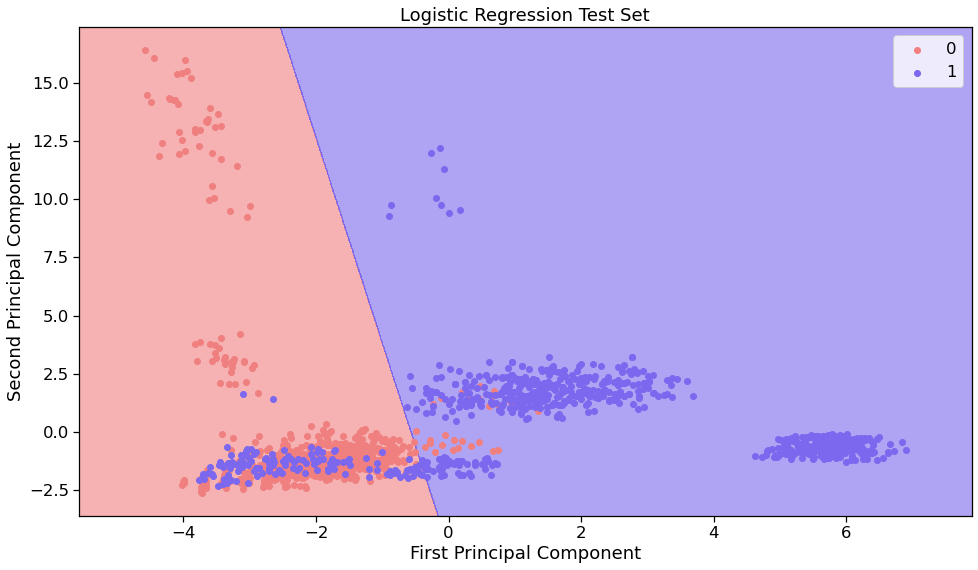

In [26]:
import seaborn as sns
from matplotlib.colors import ListedColormap

sns.set_context(context='notebook', font_scale=1.5)
plt.figure(figsize=(16,9))

X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

Z = lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

cmap = ListedColormap(('lightcoral', 'mediumslateblue'))
plt.contourf(X1, X2, Z, alpha=0.6, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=cmap(i), label=j)

plt.title("Logistic Regression Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

plt.savefig("lr_pci_ts.jpeg", format='jpeg', dpi=300, bbox_inches='tight')


## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier as DT

dt = DT(criterion='entropy',random_state=42)
dt.fit(X_train_pca,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [28]:
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,dt.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,dt.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,dt.predict(X_train_pca))))
res = cross_val_score(dt, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3371
           1       1.00      1.00      1.00      3128

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499


Confusion Matrix:
[[3371    0]
 [   0 3128]]

Average Accuracy:	0.9048

Standard Deviation:	0.0135


In [29]:
y_pred = dt.predict(X_test_pca)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print("TEST RESULTS")
print(results)

TEST RESULTS
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.900308   0.904393  0.888325  0.896287


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


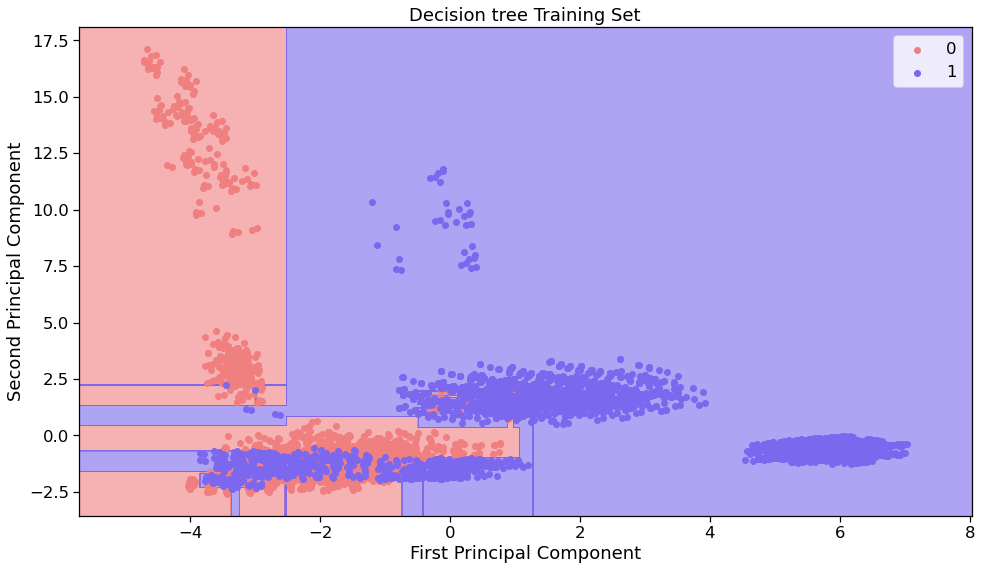

In [30]:
import seaborn as sns
sns.set_context(context='notebook',font_scale=1.5)

fig, ax = plt.subplots(figsize=(16,9))

cmap = ListedColormap(('lightcoral', 'mediumslateblue'))

X1, X2 = np.meshgrid(np.arange(start = X_train_pca[:, 0].min() - 1, stop = X_train_pca[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_train_pca[:, 1].min() - 1, stop = X_train_pca[:, 1].max() + 1, step = 0.01))

Z = dt.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
ax.contourf(X1, X2, Z, alpha = 0.6, cmap = cmap)

ax.set_xlim(X1.min(), X1.max())
ax.set_ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_train)):
    ax.scatter(X_train_pca[y_train == j, 0], X_train_pca[y_train == j, 1],
                c = cmap(i), label = j)


ax.set_title("Decision tree Training Set")
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')

ax.legend()


plt.savefig("dt_pci_tr.jpeg", format='jpeg', dpi=300, bbox_inches='tight')


plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


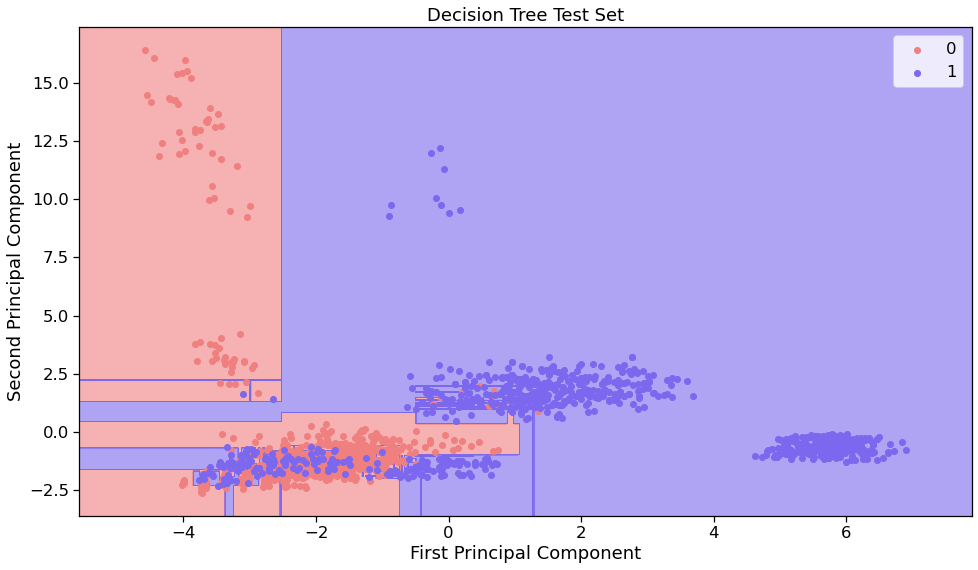

In [31]:
import seaborn as sns
from matplotlib.colors import ListedColormap

sns.set_context(context='notebook', font_scale=1.5)
plt.figure(figsize=(16,9))

X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

Z = dt.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

cmap = ListedColormap(('lightcoral', 'mediumslateblue'))
plt.contourf(X1, X2, Z, alpha=0.6, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=cmap(i), label=j)

plt.title("Decision Tree Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

plt.savefig("dt_pci_ts.jpeg", format='jpeg', dpi=300, bbox_inches='tight')


## Support Vector Machines

SVM LINEAR

In [32]:
from sklearn.svm import SVC

svm = SVC(random_state=42, gamma="auto", probability=True, kernel='linear')
svm.fit(X_train_pca, y_train)

SVC(gamma='auto', kernel='linear', probability=True, random_state=42)

In [33]:
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,svm.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,svm.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,svm.predict(X_train_pca))))
res = cross_val_score(svm, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))


TRAINING RESULTS:

Accuracy Score: 0.9023

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      3371
           1       0.96      0.83      0.89      3128

    accuracy                           0.90      6499
   macro avg       0.91      0.90      0.90      6499
weighted avg       0.91      0.90      0.90      6499


Confusion Matrix:
[[3274   97]
 [ 538 2590]]

Average Accuracy:	0.9023

Standard Deviation:	0.0083


In [34]:
y_pred = svm.predict(X_test_pca)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print("TEST RESULTS")
print(results)

TEST RESULTS
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression     0.896   0.959881  0.819797  0.884326


SVM RBF

In [35]:
from sklearn.svm import SVC

svm_rbf = SVC(random_state=42, gamma="auto", probability=True, kernel='rbf')
svm_rbf.fit(X_train_pca, y_train)

SVC(gamma='auto', probability=True, random_state=42)

In [36]:
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,svm.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,svm.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,svm.predict(X_train_pca))))
res = cross_val_score(svm, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))


TRAINING RESULTS:

Accuracy Score: 0.9023

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      3371
           1       0.96      0.83      0.89      3128

    accuracy                           0.90      6499
   macro avg       0.91      0.90      0.90      6499
weighted avg       0.91      0.90      0.90      6499


Confusion Matrix:
[[3274   97]
 [ 538 2590]]

Average Accuracy:	0.9023

Standard Deviation:	0.0083


In [37]:
y_pred = svm_rbf.predict(X_test_pca)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print("TEST RESULTS")
print(results)

TEST RESULTS
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.926154   0.971751  0.873096  0.919786


## K- Nearest Neighbors

In [38]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN()
knn.fit(X_train_pca,y_train)

KNeighborsClassifier()

In [39]:
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,knn.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,knn.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,knn.predict(X_train_pca))))
res = cross_val_score(knn, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 0.9440

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3371
           1       0.97      0.92      0.94      3128

    accuracy                           0.94      6499
   macro avg       0.95      0.94      0.94      6499
weighted avg       0.95      0.94      0.94      6499


Confusion Matrix:
[[3272   99]
 [ 265 2863]]

Average Accuracy:	0.9314

Standard Deviation:	0.0099


In [40]:
y_pred = knn.predict(X_test_pca)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print("TEST RESULTS")
print(results)

TEST RESULTS
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.929846    0.95664  0.895939  0.925295


## Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB as NB

nb = NB()
nb.fit(X_train_pca,y_train)

GaussianNB()

In [42]:
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,nb.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,nb.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,nb.predict(X_train_pca))))
res = cross_val_score(nb, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 0.8986

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      3371
           1       0.96      0.83      0.89      3128

    accuracy                           0.90      6499
   macro avg       0.91      0.90      0.90      6499
weighted avg       0.90      0.90      0.90      6499


Confusion Matrix:
[[3250  121]
 [ 538 2590]]

Average Accuracy:	0.8981

Standard Deviation:	0.0102


In [43]:
y_pred = nb.predict(X_test_pca)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print("TEST RESULTS")
print(results)

TEST RESULTS
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.893538    0.95421  0.819797  0.881911


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


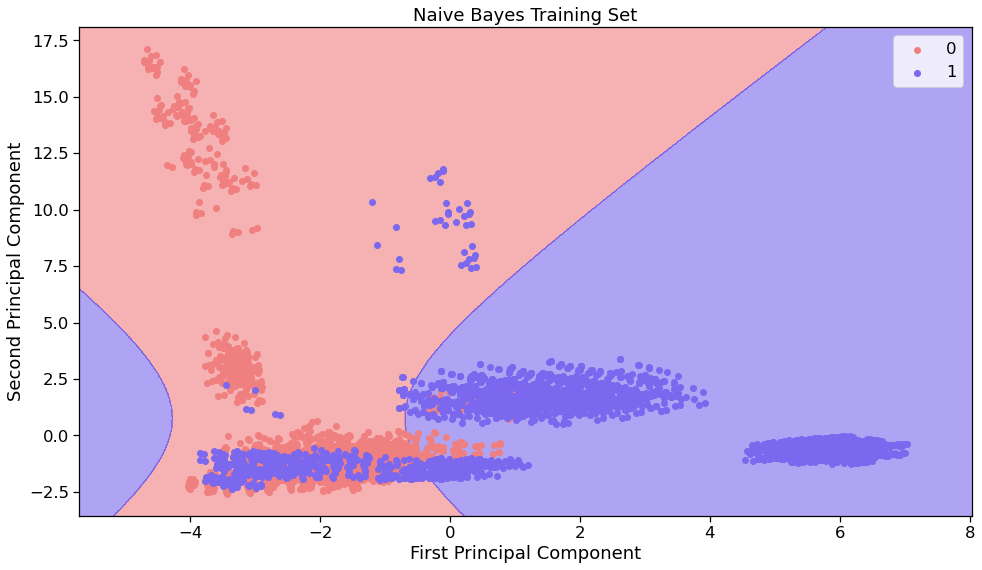

In [44]:
import seaborn as sns
sns.set_context(context='notebook',font_scale=1.5)

fig, ax = plt.subplots(figsize=(16,9))

cmap = ListedColormap(('lightcoral', 'mediumslateblue'))

X1, X2 = np.meshgrid(np.arange(start = X_train_pca[:, 0].min() - 1, stop = X_train_pca[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_train_pca[:, 1].min() - 1, stop = X_train_pca[:, 1].max() + 1, step = 0.01))

Z = nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
ax.contourf(X1, X2, Z, alpha = 0.6, cmap = cmap)

ax.set_xlim(X1.min(), X1.max())
ax.set_ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_train)):
    ax.scatter(X_train_pca[y_train == j, 0], X_train_pca[y_train == j, 1],
                c = cmap(i), label = j)


ax.set_title("Naive Bayes Training Set")
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')

ax.legend()


plt.savefig("nb_pci_tr.jpeg", format='jpeg', dpi=300, bbox_inches='tight')


plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


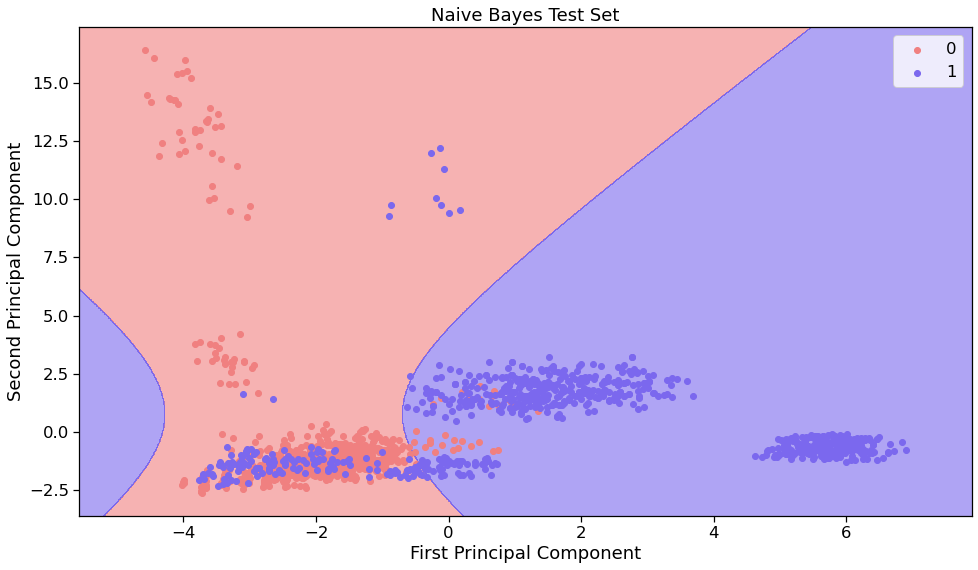

In [45]:
import seaborn as sns
from matplotlib.colors import ListedColormap

sns.set_context(context='notebook', font_scale=1.5)
plt.figure(figsize=(16,9))

X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

Z = nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

cmap = ListedColormap(('lightcoral', 'mediumslateblue'))
plt.contourf(X1, X2, Z, alpha=0.6, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=cmap(i), label=j)

plt.title("Naive Bayes Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

plt.savefig("nb_pci_ts.jpeg", format='jpeg', dpi=300, bbox_inches='tight')


## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
rf.fit(X_train_pca, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [47]:
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,rf.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,rf.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,rf.predict(X_train_pca))))
res = cross_val_score(rf, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 0.9992

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3371
           1       1.00      1.00      1.00      3128

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499


Confusion Matrix:
[[3370    1]
 [   4 3124]]

Average Accuracy:	0.9312

Standard Deviation:	0.0091


In [48]:
y_pred = rf.predict(X_test_pca)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print("TEST RESULTS")
print(results)

TEST RESULTS
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.916308   0.938172  0.885787  0.911227


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


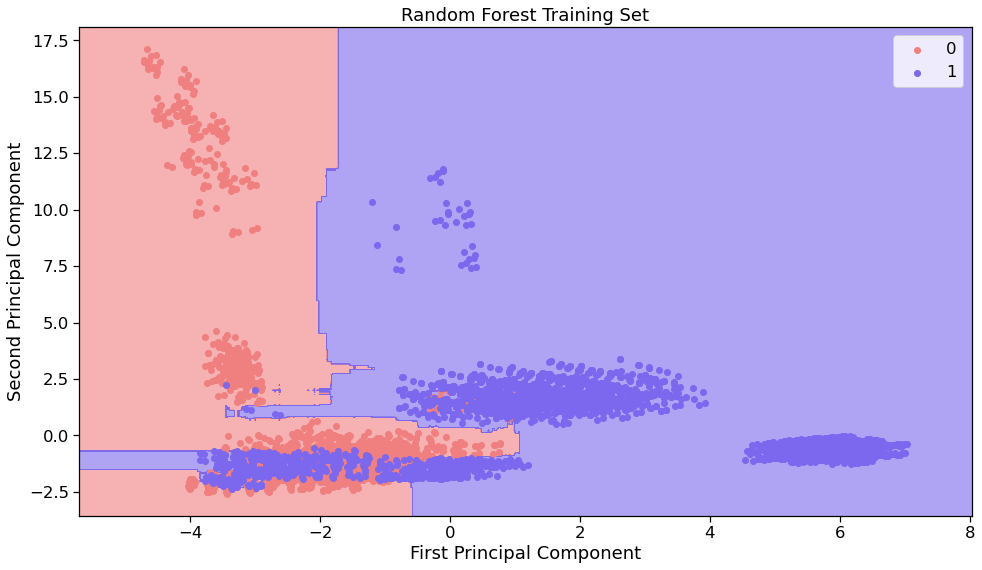

In [49]:
import seaborn as sns
sns.set_context(context='notebook',font_scale=1.5)

fig, ax = plt.subplots(figsize=(16,9))

cmap = ListedColormap(('lightcoral', 'mediumslateblue'))

X1, X2 = np.meshgrid(np.arange(start = X_train_pca[:, 0].min() - 1, stop = X_train_pca[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_train_pca[:, 1].min() - 1, stop = X_train_pca[:, 1].max() + 1, step = 0.01))

Z = rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
ax.contourf(X1, X2, Z, alpha = 0.6, cmap = cmap)

ax.set_xlim(X1.min(), X1.max())
ax.set_ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_train)):
    ax.scatter(X_train_pca[y_train == j, 0], X_train_pca[y_train == j, 1],
                c = cmap(i), label = j)


ax.set_title("Random Forest Training Set")
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')

ax.legend()


plt.savefig("rf_pci_tr.jpeg", format='jpeg', dpi=300, bbox_inches='tight')


plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


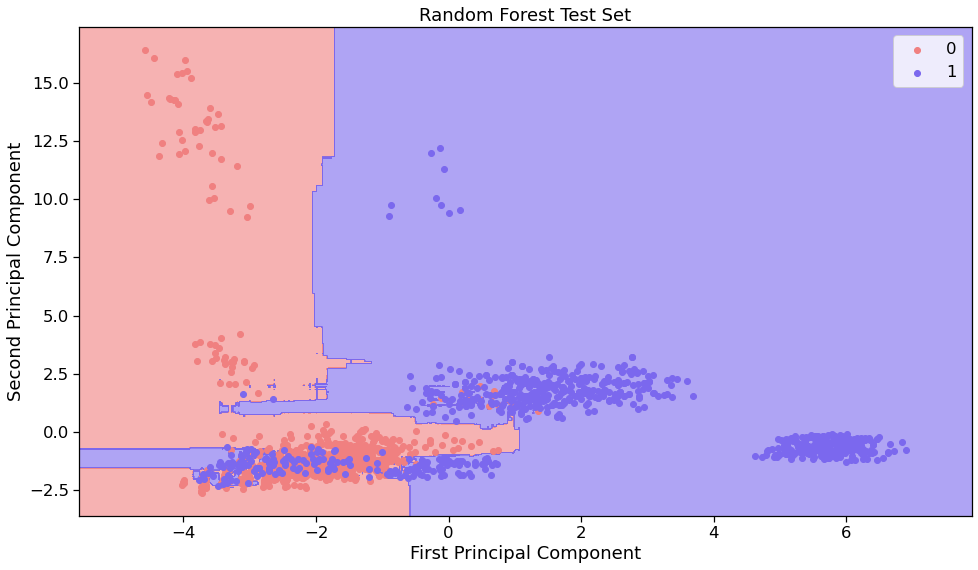

In [50]:
import seaborn as sns
from matplotlib.colors import ListedColormap

sns.set_context(context='notebook', font_scale=1.5)
plt.figure(figsize=(16,9))

X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

Z = rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

cmap = ListedColormap(('lightcoral', 'mediumslateblue'))
plt.contourf(X1, X2, Z, alpha=0.6, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=cmap(i), label=j)

plt.title("Random Forest Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

plt.savefig("rf_pci_ts.jpeg", format='jpeg', dpi=300, bbox_inches='tight')


## Adaptive Boost Classifier

In [51]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=0)
abc.fit(X_train_pca, y_train)
y_pred = abc.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [52]:
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,abc.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,abc.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,abc.predict(X_train_pca))))
res = cross_val_score(abc, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 0.9128

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3371
           1       0.97      0.85      0.90      3128

    accuracy                           0.91      6499
   macro avg       0.92      0.91      0.91      6499
weighted avg       0.92      0.91      0.91      6499


Confusion Matrix:
[[3277   94]
 [ 473 2655]]

Average Accuracy:	0.9109

Standard Deviation:	0.0088


In [53]:
y_pred = abc.predict(X_test_pca)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print("TEST RESULTS")
print(results)

TEST RESULTS
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.902769   0.959184  0.835025  0.892809


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


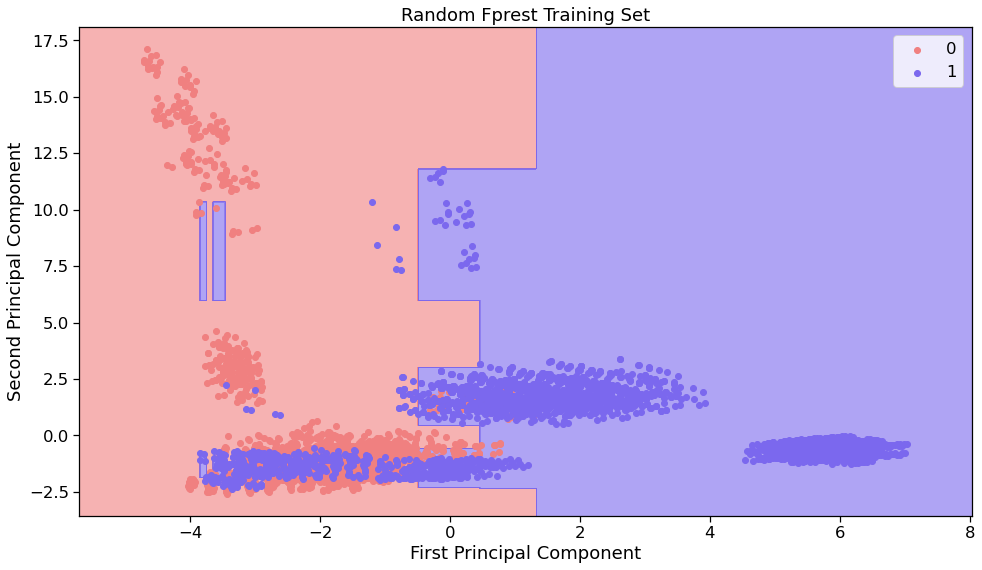

In [54]:
import seaborn as sns
sns.set_context(context='notebook',font_scale=1.5)

fig, ax = plt.subplots(figsize=(16,9))

cmap = ListedColormap(('lightcoral', 'mediumslateblue'))

X1, X2 = np.meshgrid(np.arange(start = X_train_pca[:, 0].min() - 1, stop = X_train_pca[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_train_pca[:, 1].min() - 1, stop = X_train_pca[:, 1].max() + 1, step = 0.01))

Z = abc.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
ax.contourf(X1, X2, Z, alpha = 0.6, cmap = cmap)

ax.set_xlim(X1.min(), X1.max())
ax.set_ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_train)):
    ax.scatter(X_train_pca[y_train == j, 0], X_train_pca[y_train == j, 1],
                c = cmap(i), label = j)


ax.set_title("Random Fprest Training Set")
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')

ax.legend()


plt.savefig("rf_pci_tr.jpeg", format='jpeg', dpi=300, bbox_inches='tight')


plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


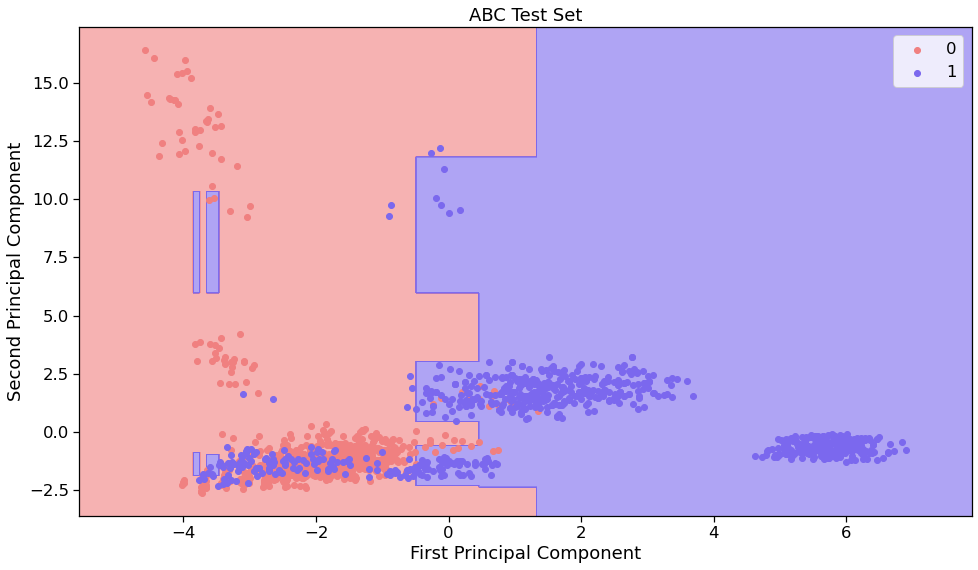

In [55]:
import seaborn as sns
from matplotlib.colors import ListedColormap

sns.set_context(context='notebook', font_scale=1.5)
plt.figure(figsize=(16,9))

X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

Z = abc.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

cmap = ListedColormap(('lightcoral', 'mediumslateblue'))
plt.contourf(X1, X2, Z, alpha=0.6, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=cmap(i), label=j)

plt.title("ABC Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

plt.savefig("rf_pci_ts.jpeg", format='jpeg', dpi=300, bbox_inches='tight')


### Final Accuracies

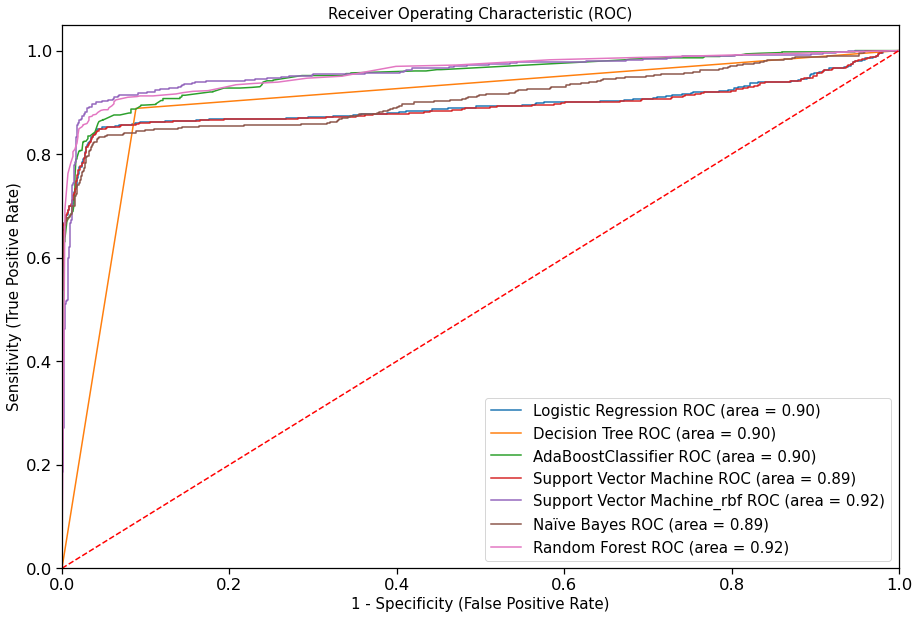

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Initialize a list of dictionaries containing the names and objects of the models
models = [
    {'label': 'Logistic Regression', 'model': lr},
    {'label': 'Decision Tree', 'model': dt},
    {'label': 'AdaBoostClassifier', 'model': abc} ,
    {'label': 'Support Vector Machine', 'model': svm},
    {'label': 'Support Vector Machine_rbf', 'model': svm_rbf},
    {'label': 'Naïve Bayes', 'model': nb},
    {'label': 'Random Forest', 'model': rf}
    
]


plt.figure(figsize=(15, 10))


for m in models:
    model = m['model']
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_pca)[:,1])
    auc = roc_auc_score(y_test, model.predict(X_test_pca))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))


plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=15)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)


plt.legend(loc='lower right', fontsize=15)
plt.savefig('roc.jpeg', format='jpeg', dpi=300, bbox_inches='tight')


plt.show()


### Testing the model and classifying the target variable.

In [57]:
input_data = (5.3,3.3)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Edible')
else:
  print('Poisonous')

[1]
Edible
